**Integrantes:**

Pedro Sanchez dos Santos

Thiago Bernardino de Seixas

# Carregando o Conjunto de Dados

In [1]:
# Tratamento dos dados
import numpy as np

# Modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Métricas de avaliação
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report

# Plot dos gráficos
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

In [2]:
# Importando o pandas
import pandas as pd

# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

data_google_id = '1BzhchN96Mx7SUcWNMeaL_j5l3lQITMxC'
gdd.download_file_from_google_drive(file_id=data_google_id,
                                    dest_path = './data.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
                                    showsize = True)

# Armazenandos os dados em um DataFrame
dados = pd.read_csv("data.csv", sep = ',')

# Analisando os Dados

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8000 non-null   int64  
 1   age         7991 non-null   float64
 2   education   7991 non-null   object 
 3   default     7992 non-null   object 
 4   balance     7989 non-null   float64
 5   housing     7987 non-null   object 
 6   loan        7982 non-null   object 
 7   month       7987 non-null   object 
 8   duration    7993 non-null   float64
 9   campaign    7991 non-null   float64
 10  pdays       7980 non-null   float64
 11  previous    7988 non-null   float64
 12  poutcome    7990 non-null   object 
 13  y           7989 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 875.1+ KB


In [4]:
dados.head()

,Unnamed: 0,age,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome,y
0,0,30.0,primary,no,1787.0,no,no,oct,79.0,1.0,-1.0,0.0,unknown,no
1,1,33.0,secondary,no,4789.0,yes,yes,may,220.0,1.0,339.0,4.0,failure,no
2,2,35.0,tertiary,no,1350.0,yes,no,apr,185.0,1.0,330.0,1.0,failure,no
3,3,30.0,tertiary,no,1476.0,yes,yes,jun,199.0,4.0,-1.0,0.0,unknown,no
4,4,59.0,secondary,no,0.0,yes,no,may,226.0,1.0,-1.0,0.0,unknown,no


In [5]:
dados.shape

(8000, 14)

In [6]:
dados.isnull().sum()

,0
Unnamed: 0,0
age,9
education,9
default,8
balance,11
housing,13
loan,18
month,13
duration,7
campaign,9


In [7]:
#Exluindo Valores Nulos
dados.dropna(inplace=True)
dados.isnull().sum()

,0
Unnamed: 0,0
age,0
education,0
default,0
balance,0
housing,0
loan,0
month,0
duration,0
campaign,0


In [8]:
dados['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [9]:
dados['default'].unique()

array(['no', 'yes'], dtype=object)

In [10]:
dados['housing'].unique()

array(['no', 'yes'], dtype=object)

In [11]:
dados['loan'].unique()

array(['no', 'yes'], dtype=object)

In [12]:
dados['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [13]:
dados['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [14]:
dados['y'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
dados.describe()

,Unnamed: 0,age,balance,duration,campaign,pdays,previous
count,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000
mean,3997.004203,41.735702,1476.445676,391.984843,2.575213,54.154885,0.789836
std,2307.621872,11.806241,2813.815655,359.781842,2.754182,114.861212,1.893173
min,0.000000,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000
25%,2003.500000,33.000000,104.000000,147.000000,1.000000,-1.000000,0.000000
50%,3996.000000,39.000000,558.000000,269.000000,2.000000,-1.000000,0.000000
75%,5995.500000,49.000000,1693.500000,526.000000,3.000000,63.000000,1.000000
max,7999.000000,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000


In [16]:
dados.drop(columns=['Unnamed: 0'],inplace=True)

In [17]:
dados.head()

,age,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,primary,no,1787.0,no,no,oct,79.0,1.0,-1.0,0.0,unknown,no
1,33.0,secondary,no,4789.0,yes,yes,may,220.0,1.0,339.0,4.0,failure,no
2,35.0,tertiary,no,1350.0,yes,no,apr,185.0,1.0,330.0,1.0,failure,no
3,30.0,tertiary,no,1476.0,yes,yes,jun,199.0,4.0,-1.0,0.0,unknown,no
4,59.0,secondary,no,0.0,yes,no,may,226.0,1.0,-1.0,0.0,unknown,no


# Corrigindo os Dados

In [18]:
convs = {'yes':1,'no':0}
dados['default'].replace(convs, inplace = True)

<ipython-input-18-bc3b2783012f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['default'].replace(convs, inplace = True)
<ipython-input-18-bc3b2783012f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['default'].replace(convs, inplace = True)


In [19]:
convs = {'yes':1,'no':0}
dados['housing'].replace(convs, inplace = True)

<ipython-input-19-756f39b701db>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['housing'].replace(convs, inplace = True)
<ipython-input-19-756f39b701db>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['housing'].replace(convs, inplace = True)


In [20]:
convs = {'yes':1,'no':0}
dados['loan'].replace(convs, inplace = True)

<ipython-input-20-8943d8f3d3f9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['loan'].replace(convs, inplace = True)
<ipython-input-20-8943d8f3d3f9>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['loan'].replace(convs, inplace = True)


In [21]:
dados.head()

,age,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,primary,0,1787.0,0,0,oct,79.0,1.0,-1.0,0.0,unknown,no
1,33.0,secondary,0,4789.0,1,1,may,220.0,1.0,339.0,4.0,failure,no
2,35.0,tertiary,0,1350.0,1,0,apr,185.0,1.0,330.0,1.0,failure,no
3,30.0,tertiary,0,1476.0,1,1,jun,199.0,4.0,-1.0,0.0,unknown,no
4,59.0,secondary,0,0.0,1,0,may,226.0,1.0,-1.0,0.0,unknown,no


In [22]:
mes = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
dados['month'].replace(mes,inplace=True)

<ipython-input-22-007b71d295a3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['month'].replace(mes,inplace=True)
<ipython-input-22-007b71d295a3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['month'].replace(mes,inplace=True)


In [23]:
edu = {'primary':1,'secondary':2,'tertiary':3,'unknown':0}
dados['education'].replace(edu,inplace=True)

<ipython-input-23-ac19951022bd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['education'].replace(edu,inplace=True)
<ipython-input-23-ac19951022bd>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['education'].replace(edu,inplace=True)


In [24]:
pt = {'unknown':0,'failure':1,'other':3,'success':2}
dados['poutcome'].replace(pt,inplace=True)

<ipython-input-24-86b11b07d6e0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['poutcome'].replace(pt,inplace=True)
<ipython-input-24-86b11b07d6e0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['poutcome'].replace(pt,inplace=True)


In [25]:
dados.head()

,age,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,1,0,1787.0,0,0,10,79.0,1.0,-1.0,0.0,0,no
1,33.0,2,0,4789.0,1,1,5,220.0,1.0,339.0,4.0,1,no
2,35.0,3,0,1350.0,1,0,4,185.0,1.0,330.0,1.0,1,no
3,30.0,3,0,1476.0,1,1,6,199.0,4.0,-1.0,0.0,0,no
4,59.0,2,0,0.0,1,0,5,226.0,1.0,-1.0,0.0,0,no


# Dividindo o Conjunto de Dados (Entrada/Saída e Trinamento/Teste)

## **Normalizando os dados, porquê a distribuição não é normal.**

In [26]:
#Divisão dos dados em Entrada (X) e Saída (y)
X = dados.drop(columns=['y'])
y = dados['y']

#Divisão em cj. de treinamento e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Ajustando as escalas dos dados:
#Instanciando um objeto em Padronização
scaler = MinMaxScaler().fit(X_train)
#Criando novos dados normalizados
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

# Treinando os Modelos

In [27]:
modelos_treino = {'Gaussiano' : GaussianNB(),
                  'LDA' : LinearDiscriminantAnalysis(),
                  'QDA' : QuadraticDiscriminantAnalysis(),
                  'SVM' : SVC(kernel='rbf')}

In [28]:
dicionario_previsoes = {}

for nome_modelo, modelo in modelos_treino.items():
  clf = modelo
  clf.fit(X_train, y_train)
  dicionario_previsoes[nome_modelo] = clf.predict(X_test)

In [29]:
dicionario_previsoes

{'Gaussiano': array(['yes', 'no', 'yes', ..., 'yes', 'yes', 'no'], dtype='<U3'),
 'LDA': array(['yes', 'no', 'yes', ..., 'no', 'yes', 'no'], dtype='<U3'),
 'QDA': array(['yes', 'no', 'yes', ..., 'yes', 'yes', 'no'], dtype=object),
 'SVM': array(['yes', 'no', 'yes', ..., 'no', 'yes', 'no'], dtype=object)}

# Verificando o Desempenho dos Modelos

In [30]:
# Checando métricas
for nome_clf, y_pred in dicionario_previsoes.items():
  print(nome_clf)
  print(classification_report(y_true=y_test, y_pred=y_pred))

Gaussiano
              precision    recall  f1-score   support

          no       0.72      0.79      0.75      1185
         yes       0.76      0.69      0.72      1171

    accuracy                           0.74      2356
   macro avg       0.74      0.74      0.74      2356
weighted avg       0.74      0.74      0.74      2356

LDA
              precision    recall  f1-score   support

          no       0.76      0.81      0.78      1185
         yes       0.79      0.74      0.77      1171

    accuracy                           0.78      2356
   macro avg       0.78      0.78      0.78      2356
weighted avg       0.78      0.78      0.78      2356

QDA
              precision    recall  f1-score   support

          no       0.73      0.79      0.76      1185
         yes       0.77      0.70      0.73      1171

    accuracy                           0.75      2356
   macro avg       0.75      0.75      0.75      2356
weighted avg       0.75      0.75      0.75      2356

S

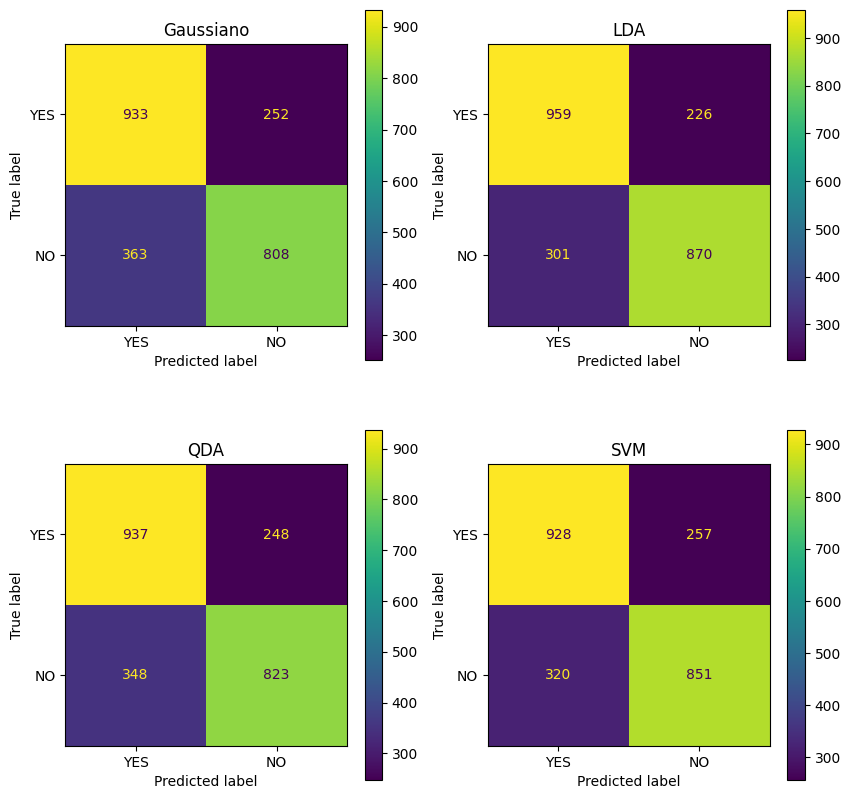

In [32]:
# Plotando as matrizes de confusão
figure = plt.figure(figsize = (10,10))

for i, (nome_clf, y_pred) in enumerate(dicionario_previsoes.items()):
  cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels = dados["y"].unique())
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= ['YES','NO'])
  ax = plt.subplot(2,2,i+1)
  disp.plot(ax=ax,values_format = "d")
  ax.set_title(nome_clf)

# Relatório

-De acordo com a nossa análise, o modelo de classificação "QDA" mais se adequa aos requisitos do cliente, por exibir uma taxa de falso negativo menor que os demais.